# Creation des tableaux

In [1]:
import pandas as pd

excel="../data/solar_panel_data_madagascar_exp.xlsx"

# Lire les trois "pages" en utilisant des plages de lignes différentes
df1 = pd.read_excel(excel, sheet_name="LEV_1")
df2 = pd.read_excel(excel, sheet_name="LEV_2")
df3 = pd.read_excel(excel, sheet_name="LEV_3")

In [2]:
df1.head()

number img_name      img_long_East       img_lat_South img_origin type1  \
0       1        1   47.5345907420514   -18.8697711268243          S   mix   
1       2        2   47.5351792020792   -18.8702019651336          S  boil   
2       3        3  47.53462681005869  -18.87033899562938          S  boil   
3       4        4  47.53318202084998  -18.87099269211778          S  boil   
4       5        5   47.5210793857318   -18.8980030081674          S  boil   

   elt_nbr type2  park_capacity_kw  cam_alt  mouse_alt  width_pixel  \
0        6   NaN               NaN   1368.0     1251.0          709   
1        1   NaN               NaN   1298.0     1251.0         1056   
2        2   NaN               NaN   1357.0     1252.0          736   
3        1   NaN               NaN   1299.0     1267.0          531   
4        1   NaN               NaN   1323.0     1266.0          594   

   height_pixel          city  region   img_date img_time  img_altsea zoom  \
0           691  Antananarivo  Center 2023-07-01      NaN         NaN  NaN   
1           688  Antananarivo  Center 2023-07-01      NaN         NaN  NaN   
2           612  Antananarivo  Center 2023-07-01      NaN         NaN  NaN   
3           541  Antananarivo  Center 2023-07-01      NaN         NaN  NaN   
4           441  Antananarivo  Center 2023-07-01      NaN         NaN  NaN   

   img_ISO  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN

In [3]:
df2.head()

img_name elt_name type1 type2  boil_nbr  pan_nbr  pan_area_sqm notes
0      953    953z2   pan  roof       NaN      1.0          0.65   NaN
1      691    691z1   pan  roof       NaN      1.0          0.68   NaN
2      705    705z2   pan  roof       NaN      1.0          0.68   NaN
3      593    593z1   pan  roof       NaN      1.0          0.75   NaN
4      593    593z2   pan  roof       NaN      1.0          0.75   NaN

In [4]:
df3.head()

elt_name edge_rank long    lat
0      2z1         1  212  116.0
1      2z1         2  316  164.0
2      2z1         3  284  244.0
3      2z1         4  178  205.0
4      3z1         1  153  201.0

## Creation d'un tableau avec les pans

In [5]:
df1_pan = df1[df1["type1"].isin(["pan", "mix"])].dropna(subset=["img_long_East", "img_lat_South"])
df1_pan

number img_name      img_long_East       img_lat_South img_origin  \
0           1        1   47.5345907420514   -18.8697711268243          S   
6           7        7  47.51628735878672   -18.8968651398945          S   
7           8        8  47.51564193484253  -18.89707702267596          S   
8           9        9  47.59130389961764  -18.84893513538576          S   
11         14       14  47.51842712623053  -18.87498539004466          S   
...       ...      ...                ...                 ...        ...   
11143   11335    11335   46.3817102355233  -15.69932886974522          S   
11145   11337    11337  47.55325599048155   -18.8025105780676          S   
11146   11338    11338  49.29779188297761  -12.34366879622712          S   
11149   11341    11341  47.58742827261108   -18.9816251202421          S   
11152   11344    11344  50.28542464284555  -14.90655715932011          S   

      type1  elt_nbr type2  park_capacity_kw  cam_alt  mouse_alt  width_pixel  \
0       mix        6   NaN               NaN   1368.0     1251.0          709   
6       pan        2   NaN               NaN   1300.0     1250.0          834   
7       pan        3   NaN               NaN   1358.0     1249.0          546   
8       mix        2   NaN               NaN   1388.0     1313.0          459   
11      pan        2   NaN               NaN   1443.0     1249.0          633   
...     ...      ...   ...               ...      ...        ...          ...   
11143   pan        1   NaN               NaN    166.0       24.0          676   
11145   pan        2   NaN               NaN   1316.0     1248.0          880   
11146   mix        2   NaN               NaN    113.0       51.0          711   
11149   pan        1   NaN               NaN   1299.0     1267.0          688   
11152   pan        1   NaN               NaN    105.0       10.0          426   

       height_pixel          city  region   img_date img_time  img_altsea  \
0               691  Antananarivo  Center 2023-07-01      NaN         NaN   
6               634  Antananarivo  Center 2023-07-01      NaN         NaN   
7               637  Antananarivo  Center 2023-07-01      NaN         NaN   
8               634  Antananarivo  Center 2023-07-01      NaN         NaN   
11              555  Antananarivo  Center 2023-07-01      NaN         NaN   
...             ...           ...     ...        ...      ...         ...   
11143           604       Majunga    West 2023-07-01      NaN         NaN   
11145           642  Antananarivo  Center 2023-07-01      NaN         NaN   
11146           564   Antsiranana   North 2023-07-01      NaN         NaN   
11149           583  Antananarivo  Center 2023-07-01      NaN         NaN   
11152           633      Antalaha   North 2023-07-01      NaN         NaN   

      zoom  img_ISO  
0      NaN      NaN  
6      NaN      NaN  
7      NaN      NaN  
8      NaN      NaN  
11     NaN      NaN  
...    ...      ...  
11143  NaN      NaN  
11145  NaN      NaN  
11146  NaN      NaN  
11149  NaN      NaN  
11152  NaN      NaN  

[9953 rows x 20 columns]

In [6]:
df_grouped=df1_pan.groupby(['img_long_East', 'img_lat_South']).size().reset_index(name='count').sort_values(by='count', ascending=False)
df_grouped

img_long_East       img_lat_South  count
6797          48.508347          -17.633474      9
6773          48.505520          -17.632355      8
6909          48.516270          -17.613779      7
1178          46.734219          -19.024809      7
6814          48.509140          -17.632616      6
...                 ...                 ...    ...
3058          47.177197          -18.079992      1
3057          47.177170          -18.085093      1
3056          47.177113          -18.083303      1
3055          47.177032          -18.082699      1
8453  50.28542464284828  -14.90789052132945      1

[8454 rows x 3 columns]

In [7]:
df_grouped.groupby(["count"]).size()

count
1    7334
2     855
3     187
4      58
5      11
6       5
7       2
8       1
9       1
dtype: int64

In [8]:
df_grouped[df_grouped["img_long_East"].isna()]

Empty DataFrame
Columns: [img_long_East, img_lat_South, count]
Index: []

# Plots des géopo

In [9]:
df1_pan.groupby("city").size().reset_index(name='count').sort_values(by='count', ascending=False)

city  count
93    Antananarivo    719
263    Maevatanana    355
27    Ambondromamy    326
86        Ankazobe    310
269       Manakara    227
..             ...    ...
178    Fanambana 3      1
179   Fanambana 30      1
180   Fanambana 31      1
181   Fanambana 32      1
150  Fanambana 130      1

[300 rows x 2 columns]

In [10]:
import folium 

df_grouped['img_lat_South'] = pd.to_numeric(df_grouped['img_lat_South'], errors='coerce')

df_grouped['img_long_East'] = pd.to_numeric(df_grouped['img_long_East'], errors='coerce')

df_grouped=df_grouped.dropna(subset=["img_long_East", "img_lat_South"])

map_center = [df_grouped['img_lat_South'].mean(), df_grouped['img_long_East'].mean()]
my_map = folium.Map(location=map_center, zoom_start=6)

for index, row in df_grouped.iterrows():
    folium.CircleMarker(
        location=[row['img_lat_South'], row['img_long_East']],
        radius=1,
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(my_map)
    
my_map

# Date images

In [11]:
df1_pan.groupby("img_date").size().reset_index(name='count').sort_values(by='count', ascending=False)

img_date  count
0  2023-07-01    977
46 2023-09-13    699
44 2023-09-10    591
25 2023-08-06    504
38 2023-09-04    385
42 2023-09-08    384
43 2023-09-09    377
33 2023-08-16    363
26 2023-08-07    354
29 2023-08-11    328
39 2023-09-05    326
36 2023-09-02    306
31 2023-08-14    283
41 2023-09-07    278
28 2023-08-10    259
24 2023-08-05    209
15 2023-07-22    205
23 2023-08-04    198
34 2023-08-17    193
3  2023-07-08    186
37 2023-09-03    186
12 2023-07-17    186
17 2023-07-24    174
35 2023-09-01    173
40 2023-09-06    159
27 2023-08-09    154
45 2023-09-11    143
21 2023-07-28    142
47 2023-09-15    136
22 2023-08-03    108
32 2023-08-15    107
18 2023-07-25     99
10 2023-07-15     92
30 2023-08-12     90
16 2023-07-23     86
14 2023-07-21     73
19 2023-07-26     69
11 2023-07-16     57
48 2023-09-26     50
4  2023-07-09     45
2  2023-07-07     45
13 2023-07-18     41
8  2023-07-13     36
5  2023-07-10     24
7  2023-07-12     23
6  2023-07-11     21
9  2023-07-14     13
1  2023-07-06     11
20 2023-07-27      5

# Format image

In [12]:
df1_pan.groupby(['img_origin']).size().reset_index(name='count') \
    .sort_values(by='count', ascending=False)

img_origin  count
0          D   8976
1          S    977

In [13]:
df1_pan.loc[df1_pan["img_origin"] == "D"].groupby(['width_pixel', 'height_pixel', 'img_origin']).size().reset_index(name='count') \
    .sort_values(by='count', ascending=False)

width_pixel  height_pixel img_origin  count
2         4000          3000          D   7038
3         5280          3956          D   1934
0         3048          4064          D      3
1         3840          2160          D      1

In [14]:
df1_pan.loc[df1_pan["img_origin"] == "S"].groupby(['width_pixel', 'height_pixel', 'img_origin']).size().reset_index(name='count') \
    .sort_values(by='count', ascending=False)

width_pixel  height_pixel img_origin  count
256          499           529          S      2
426          580           502          S      2
700          700           511          S      2
944          955           525          S      2
542          628           517          S      2
..           ...           ...        ...    ...
329          532           649          S      1
330          534           357          S      1
331          534           382          S      1
332          534           715          S      1
970         1474           474          S      1

[971 rows x 4 columns]

In [15]:
df1_pan.merge(df2, on="img_name", how="left").sum(numeric_only=True)

number              1.153140e+08
elt_nbr             1.074690e+05
park_capacity_kw    2.907470e+05
cam_alt             3.157119e+06
mouse_alt           2.802558e+06
width_pixel         8.058510e+07
height_pixel        6.061290e+07
img_altsea          9.824516e+06
img_ISO             2.493673e+06
boil_nbr            9.020000e+02
pan_nbr             8.989800e+04
pan_area_sqm        5.041277e+04
dtype: float64

In [16]:
merged_df = df1_pan.merge(df2, on="img_name", how="left")
filtered_df = merged_df.loc[merged_df["pan_nbr"] <= 100]
result = filtered_df.groupby("pan_nbr").size()
print(result)

pan_nbr
1.0      12103
2.0       3435
3.0       1151
4.0        718
5.0        281
         ...  
92.0         1
93.0         1
96.0         5
99.0         2
100.0        6
Length: 74, dtype: int64


In [17]:
merged_df = df1_pan.merge(df2, on="img_name", how="left")
filtered_df = merged_df.loc[merged_df["pan_nbr"] <= 100]
result = filtered_df.sum(numeric_only=True)
print(result)

number              1.130144e+08
elt_nbr             9.729700e+04
park_capacity_kw    8.720000e+04
cam_alt             2.500012e+06
mouse_alt           2.226684e+06
width_pixel         7.815376e+07
height_pixel        5.876270e+07
img_altsea          9.560594e+06
img_ISO             2.400723e+06
boil_nbr            3.000000e+00
pan_nbr             6.371300e+04
pan_area_sqm        3.147946e+04
dtype: float64


In [18]:
df2.sum(numeric_only=True)

boil_nbr          2732.00
pan_nbr         134334.00
pan_area_sqm    588050.36
dtype: float64

In [19]:
df1_pan.groupby(["type1"]).size()

type1
mix     428
pan    9525
dtype: int64

In [20]:
df1_pan.groupby("img_origin")["img_altsea"].describe()

count        mean         std   min     25%    50%    75%  \
img_origin                                                               
D           8976.0  543.147633  511.864808  1.54  102.94  233.8  904.0   
S              0.0         NaN         NaN   NaN     NaN    NaN    NaN   

                max  
img_origin           
D           1876.32  
S               NaN

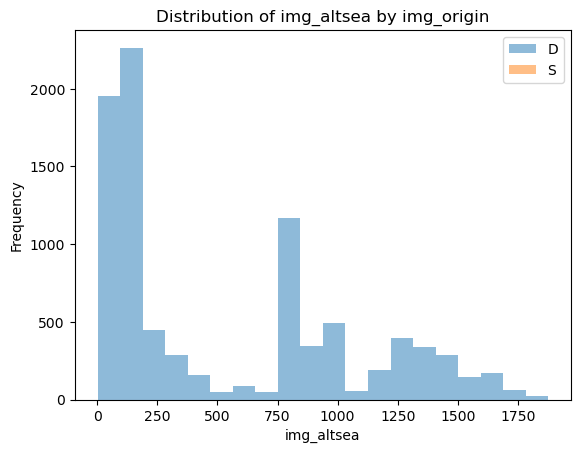

In [21]:
import matplotlib.pyplot as plt

df1_pan.groupby("img_origin")["img_altsea"].plot(kind="hist", alpha=0.5, legend=True, bins=20)
plt.xlabel("img_altsea")
plt.ylabel("Frequency")
plt.title("Distribution of img_altsea by img_origin")
plt.show()